In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("XAU_gold_data.csv", sep= ";")

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2004.06.11 00:00,384.00,384.80,382.80,384.10,272
1,2004.06.14 00:00,384.30,385.80,381.80,382.80,1902
2,2004.06.15 00:00,382.80,388.80,381.10,388.60,1951
3,2004.06.16 00:00,387.10,389.80,382.60,383.80,2014
4,2004.06.17 00:00,383.60,389.30,383.00,387.60,1568
...,...,...,...,...,...,...
5290,2025.01.28 00:00,2739.91,2765.11,2734.81,2763.17,83114
5291,2025.01.29 00:00,2763.23,2766.20,2744.76,2759.68,83303
5292,2025.01.30 00:00,2759.61,2798.49,2758.23,2794.06,83835
5293,2025.01.31 00:00,2795.08,2817.23,2791.02,2799.23,91164


In [ ]:
df = df.rename(columns={"Date" : "ds", "Close" : "y"})

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet(daily_seasonality=True)

In [ ]:
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4e3_acwt/n0gbiagc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4e3_acwt/5jbzf2zw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13181', 'data', 'file=/tmp/tmp4e3_acwt/n0gbiagc.json', 'init=/tmp/tmp4e3_acwt/5jbzf2zw.json', 'output', 'file=/tmp/tmp4e3_acwt/prophet_model_tm22ngc/prophet_model-20250206023439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:34:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:34:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods= 365)

In [ ]:
forecast = model.predict(future)

In [ ]:
import matplotlib.pyplot as plt

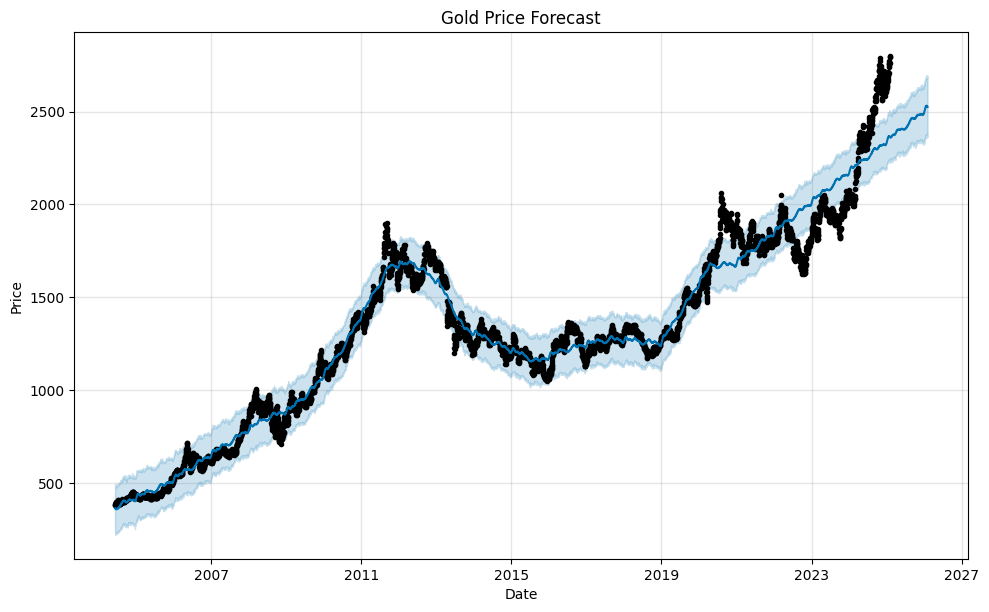

In [ ]:
fig = model.plot(forecast)
plt.title('Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('gold_price_forecast.png')
plt.show()

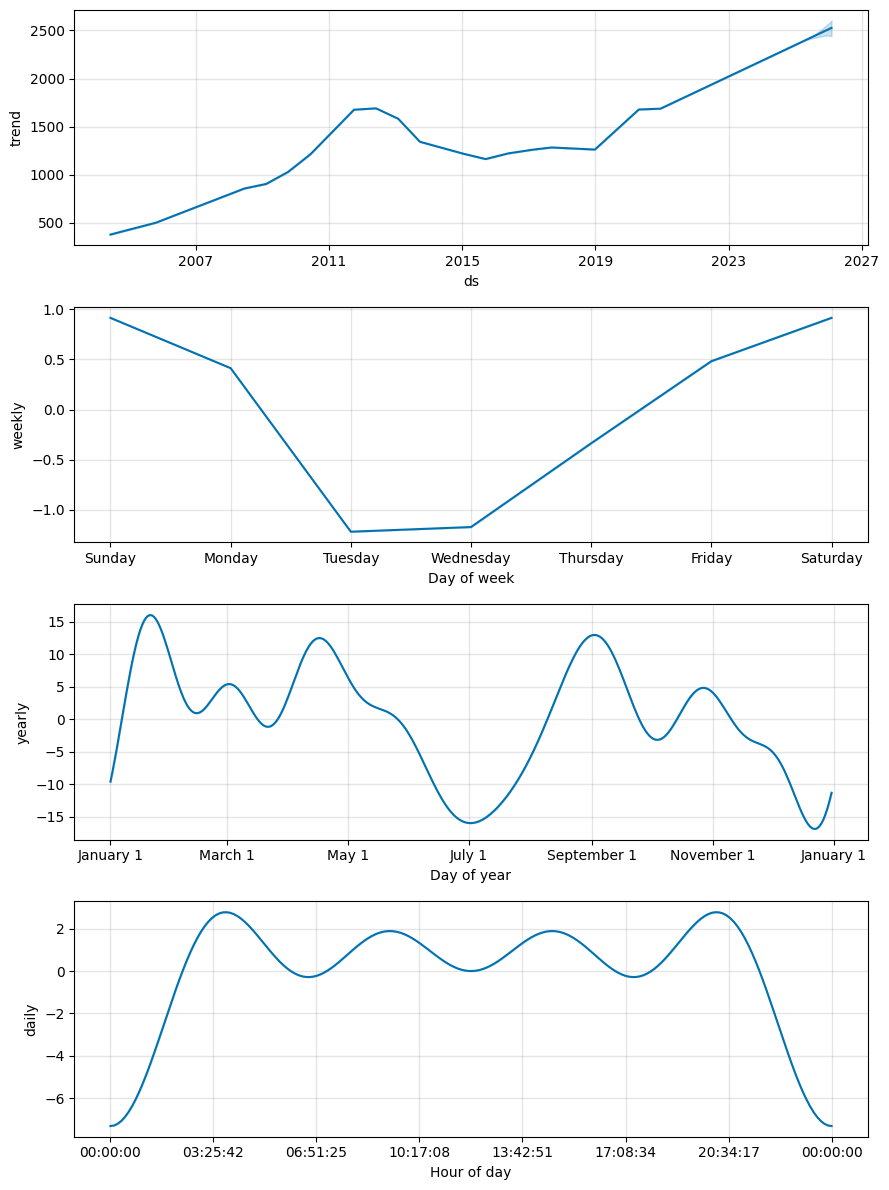

In [ ]:
fig2 = model.plot_components(forecast)
plt.savefig('trend_seasonality_components.png')
plt.show()

In [ ]:
import pickle

In [ ]:
df

,ds,Open,High,Low,y,Volume
0,2004.06.11 00:00,384.00,384.80,382.80,384.10,272
1,2004.06.14 00:00,384.30,385.80,381.80,382.80,1902
2,2004.06.15 00:00,382.80,388.80,381.10,388.60,1951
3,2004.06.16 00:00,387.10,389.80,382.60,383.80,2014
4,2004.06.17 00:00,383.60,389.30,383.00,387.60,1568
...,...,...,...,...,...,...
5290,2025.01.28 00:00,2739.91,2765.11,2734.81,2763.17,83114
5291,2025.01.29 00:00,2763.23,2766.20,2744.76,2759.68,83303
5292,2025.01.30 00:00,2759.61,2798.49,2758.23,2794.06,83835
5293,2025.01.31 00:00,2795.08,2817.23,2791.02,2799.23,91164


In [ ]:
df = forecast[["ds", "yhat"]]

In [ ]:
df

,ds,yhat
0,2004-06-11,364.271368
1,2004-06-14,363.086775
2,2004-06-15,361.120982
3,2004-06-16,360.857732
4,2004-06-17,361.411014
...,...,...
5655,2026-01-30,2529.305058
5656,2026-01-31,2529.174780
5657,2026-02-01,2528.593972
5658,2026-02-02,2527.513251


In [ ]:
with open('gold_price_model.pkl', 'wb') as f:
    pickle.dump(df, f)

print("Model saved as gold_price_model.pkl")

Model saved as gold_price_model.pkl
